Step 1: Load the data

In [1]:
import pandas as pd

pd.set_option("mode.copy_on_write", True)

In [2]:
df = pd.read_parquet("merged_transaction_population.parquet", engine='pyarrow')
df["Dosage_Per_100k"] = df["Dosage_Per_100k"]/ 100000

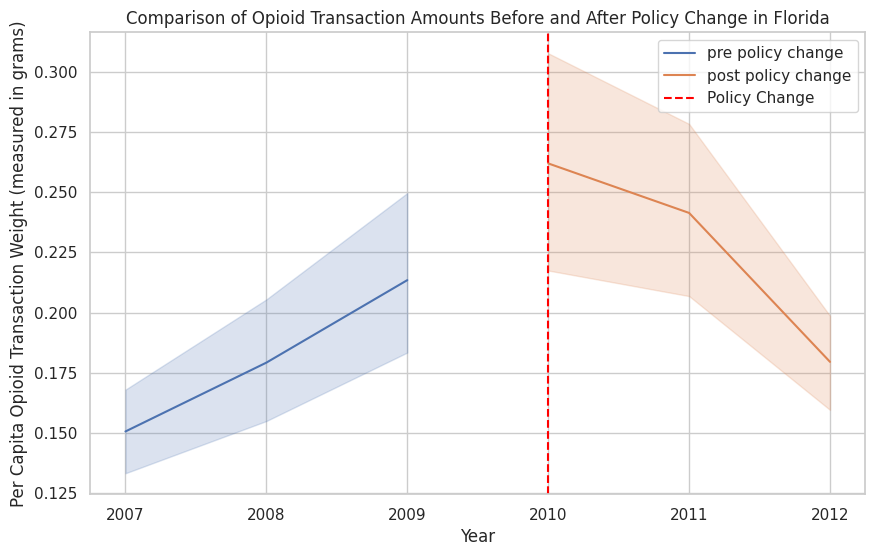

In [17]:
fl = df[df['BUYER_STATE'] == 'FL']
pre_fl = fl[fl['Year'].isin([2007, 2008, 2009])]
post_fl = fl[fl['Year'].isin([2010, 2011, 2012])]

# plot pre_fl and post_fl in one graph
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

sns.lineplot(data=pre_fl, x="Year", y="Dosage_Per_100k", label="pre policy change")
sns.lineplot(data=post_fl, x="Year", y="Dosage_Per_100k", label="post policy change")

# Add a vertical line for policy change at year 2010
plt.axvline(x=2010, color='red', linestyle='--', label='Policy Change')

plt.xlabel("Year")
plt.ylabel("Per Capita Opioid Transaction Weight (measured in grams)")
plt.title("Comparison of Opioid Transaction Amounts Before and After Policy Change in Florida")
plt.legend()

plt.show()


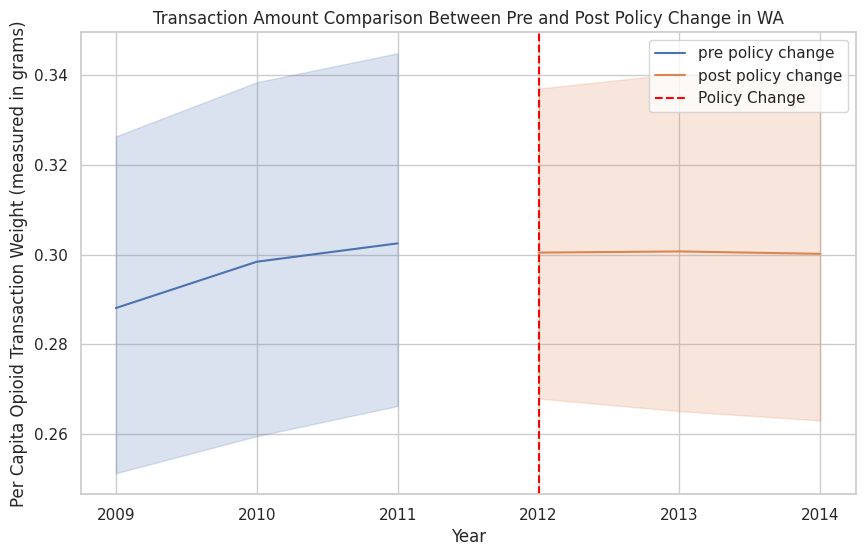

In [9]:
wa = df[df['BUYER_STATE'] == 'WA']
pre_wa = wa[wa['Year'].isin([2009, 2010, 2011])]
post_wa = wa[wa['Year'].isin([2012, 2013, 2014])]

# plot pre_wa and post_wa in one graph
plt.figure(figsize=(10, 6))

sns.lineplot(data=pre_wa, x="Year", y="Dosage_Per_100k", label="pre policy change")
sns.lineplot(data=post_wa, x="Year", y="Dosage_Per_100k", label="post policy change")

# Add a vertical line for policy change at year 2010
plt.axvline(x=2012, color='red', linestyle='--', label='Policy Change')

plt.xlabel("Year")
plt.ylabel("Per Capita Opioid Transaction Weight (measured in grams)")
plt.title("TComparison of Opioid Transaction Amounts Before and After Policy Change in Washington")
plt.legend()

plt.show()


In [5]:
import pandas as pd
import statsmodels.api as sm

wa_plus_ref = df[df['BUYER_STATE'].isin(['OR','IL', 'WY','WA'])]
wa_plus_ref = wa_plus_ref [wa_plus_ref ['Year'].isin([2009, 2010, 2011, 2012, 2013, 2014])]
# Create indicators for the post-policy change period and treatment state
wa_plus_ref['PostPolicy'] = (wa_plus_ref['Year'] >= 2012).astype(int) 
wa_plus_ref['Treated'] = (wa_plus_ref['BUYER_STATE'] == 'WA').astype(int)

# Create interaction terms
wa_plus_ref['PostPolicy_Treated'] = wa_plus_ref['PostPolicy'] * wa_plus_ref['Treated']
wa_plus_ref['Year_PostPolicy'] = wa_plus_ref['Year'] * wa_plus_ref['PostPolicy']
wa_plus_ref['Year_PostPolicy_Treated'] = wa_plus_ref['Year'] * wa_plus_ref['PostPolicy'] * wa_plus_ref['Treated']

# Define the model
model = sm.OLS(wa_plus_ref['Dosage_Per_100k'], sm.add_constant(wa_plus_ref[['PostPolicy', 'Treated', 'PostPolicy_Treated', 'Year', 'Year_PostPolicy', 'Year_PostPolicy_Treated']]))

# Fit the model
results = model.fit()

# Print regression results
print(results.summary())



                            OLS Regression Results                            
Dep. Variable:        Dosage_Per_100k   R-squared:                       0.043
Model:                            OLS   Adj. R-squared:                  0.038
Method:                 Least Squares   F-statistic:                     8.826
Date:                Tue, 28 Nov 2023   Prob (F-statistic):           1.96e-09
Time:                        17:41:53   Log-Likelihood:                 649.94
No. Observations:                1189   AIC:                            -1286.
Df Residuals:                    1182   BIC:                            -1250.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

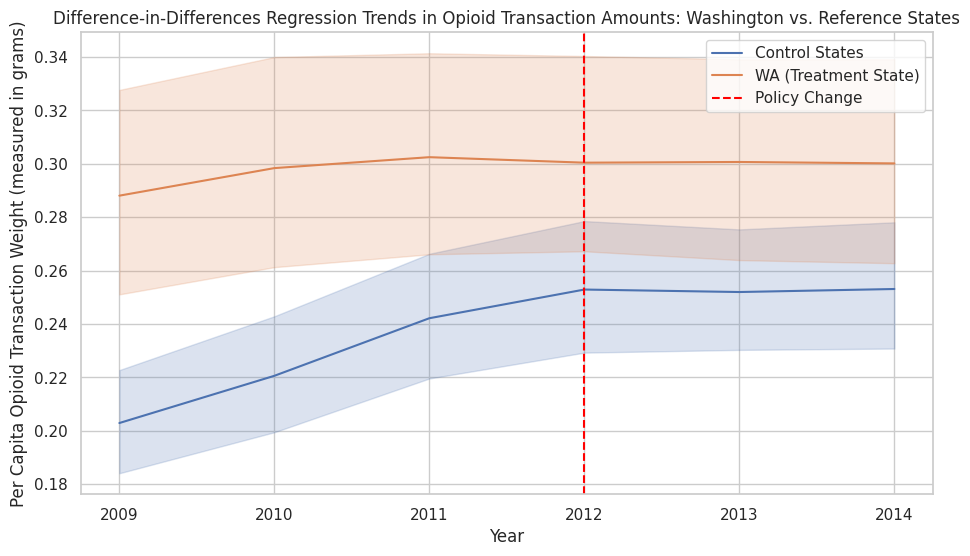

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the results
sns.set(style="whitegrid")

# Separate the data for control (non-'WA') and treatment ('WA')
df_control = wa_plus_ref[wa_plus_ref['Treated'] == 0]
df_treatment = wa_plus_ref[wa_plus_ref['Treated'] == 1]

# Plot the trends
plt.figure(figsize=(11, 6))
sns.lineplot(x='Year', y='Dosage_Per_100k', data=df_control, label='Control States')
sns.lineplot(x='Year', y='Dosage_Per_100k',  data=df_treatment, label='WA (Treatment State)')
# Add a vertical line for policy change at year 2012
plt.axvline(x=2012, color='red', linestyle='--', label='Policy Change')

plt.title('Difference-in-Differences Regression Trends in Opioid Transaction Amounts: Washington vs. Reference States')
plt.xlabel('Year')
plt.ylabel('Per Capita Opioid Transaction Weight (measured in grams)')
plt.legend()
plt.show()


In [7]:
fl_plus_ref = df[df['BUYER_STATE'].isin(['FL', 'OH', 'WV', 'IL'])]
fl_plus_ref = fl_plus_ref[fl_plus_ref['Year'].isin([2007, 2008, 2009, 2010, 2011, 2012])]

# Create indicators for the post-policy change period and treatment state
fl_plus_ref['PostPolicy'] = (fl_plus_ref['Year'] >= 2010).astype(int)
fl_plus_ref['Treated'] = (fl_plus_ref['BUYER_STATE'] == 'FL').astype(int)

# Create interaction terms
fl_plus_ref['PostPolicy_Treated'] = fl_plus_ref['PostPolicy'] * fl_plus_ref['Treated']
fl_plus_ref['Year_PostPolicy'] = fl_plus_ref['Year'] * fl_plus_ref['PostPolicy']
fl_plus_ref['Year_PostPolicy_Treated'] = fl_plus_ref['Year'] * fl_plus_ref['PostPolicy'] * fl_plus_ref['Treated']

# Define the model
model2 = sm.OLS(fl_plus_ref['Dosage_Per_100k'], sm.add_constant(fl_plus_ref[['PostPolicy', 'Treated', 'PostPolicy_Treated', 'Year', 'Year_PostPolicy', 'Year_PostPolicy_Treated']]))

# Fit the model
result2 = model.fit()

# Print regression results
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:        Dosage_Per_100k   R-squared:                       0.043
Model:                            OLS   Adj. R-squared:                  0.038
Method:                 Least Squares   F-statistic:                     8.826
Date:                Tue, 28 Nov 2023   Prob (F-statistic):           1.96e-09
Time:                        17:41:54   Log-Likelihood:                 649.94
No. Observations:                1189   AIC:                            -1286.
Df Residuals:                    1182   BIC:                            -1250.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

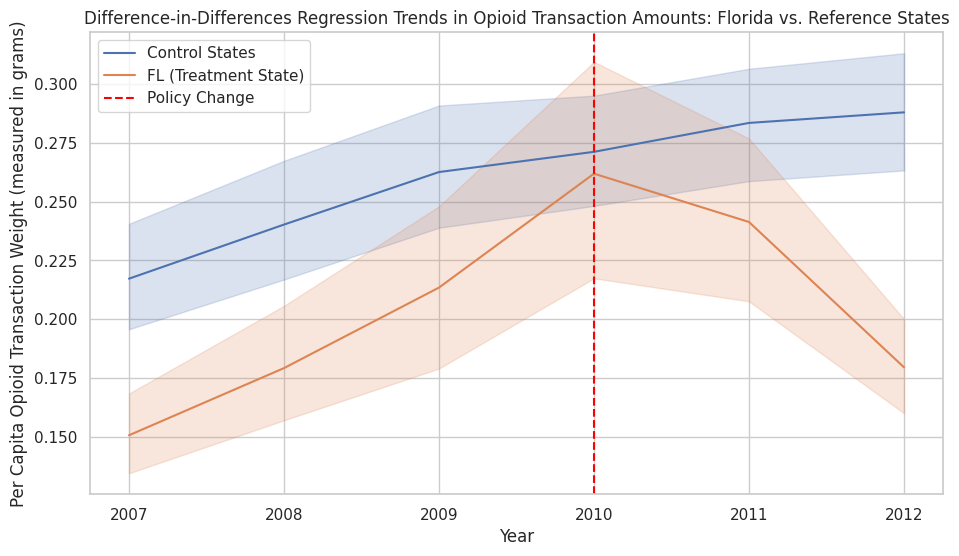

In [15]:
# Separate the data for control (non-'FL') and treatment ('FL')
df_control = fl_plus_ref[fl_plus_ref['Treated'] == 0]
df_treatment = fl_plus_ref[fl_plus_ref['Treated'] == 1]

# Plot the trends
plt.figure(figsize=(11, 6))
sns.lineplot(x='Year', y='Dosage_Per_100k', data=df_control, label='Control States')
sns.lineplot(x='Year', y='Dosage_Per_100k',  data=df_treatment, label='FL (Treatment State)')
# Add a vertical line for policy change at year 2010
plt.axvline(x=2010, color='red', linestyle='--', label='Policy Change')

plt.title('Difference-in-Differences Regression Trends in Opioid Transaction Amounts: Florida vs. Reference States')
plt.xlabel('Year')
plt.ylabel('Per Capita Opioid Transaction Weight (measured in grams)')
plt.legend()
plt.show()
